# 1. Importação das Bibliotecas

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from pmdarima.arima.utils import ndiffs
import seaborn as sns

# 2 Carregando o Dataset

In [199]:
elnino_data = sm.datasets.elnino.load_pandas().data
elnino_data['mean'] = elnino_data.iloc[:, 1:].mean(axis=1)  # Média anual
elnino_series = pd.Series(elnino_data['mean'].values, index=elnino_data['YEAR'])

elnino_series.head()

YEAR
1950.0    21.953333
1951.0    23.710833
1952.0    22.665000
1953.0    23.644167
1954.0    21.441667
dtype: float64

# 3. Exploração e visualização inicial

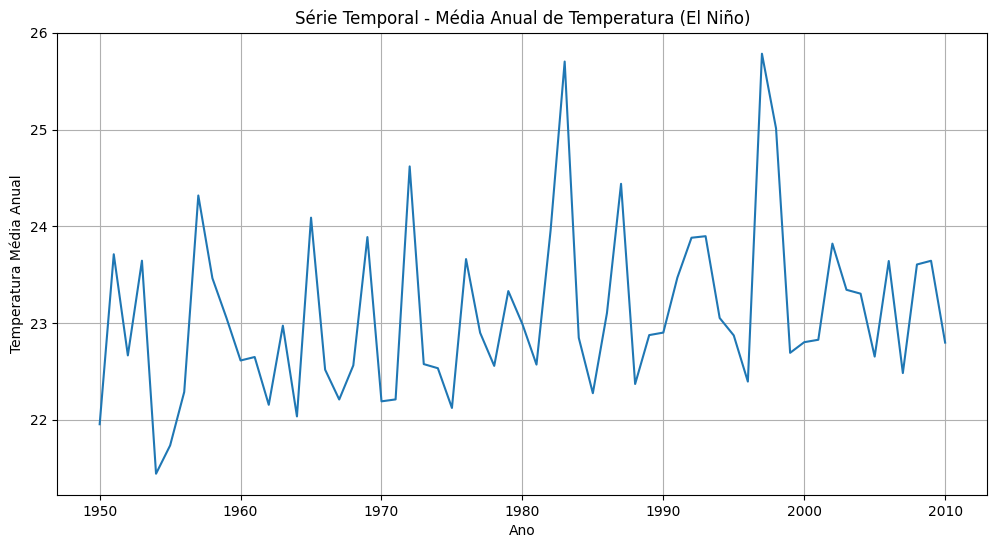

In [200]:
plt.figure(figsize=(12, 6))
elnino_series.plot(title='Série Temporal - Média Anual de Temperatura (El Niño)')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média Anual')
plt.grid(True)
plt.show()

# 4. Análise de normalidade

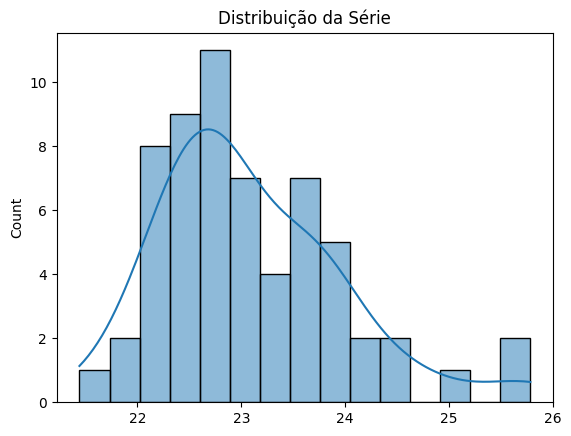

In [201]:
sns.histplot(elnino_series, kde=True, bins=15)
plt.title("Distribuição da Série")
plt.show()

# QQ plot

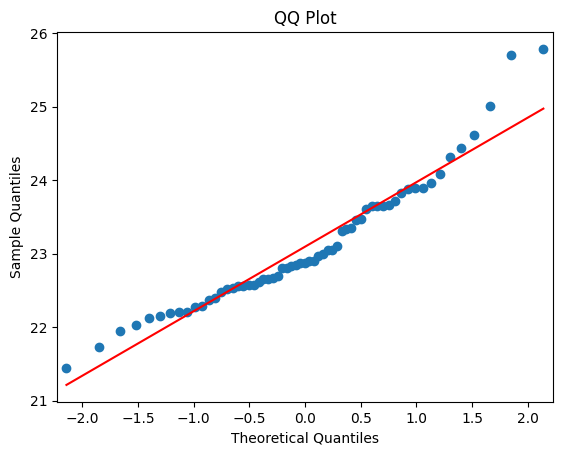

In [202]:
sm.qqplot(elnino_series, line='s')
plt.title("QQ Plot")
plt.show()

O gráfico sugere que seus dados são aproximadamente normalmente distribuídos, mas com alguns desvios nas caudas

# 5. Análise de estacionariedade

In [203]:
kpss_stat, p_value, lags, critical_values = kpss(elnino_series)
print('Teste KPSS:')
print(f'Estatística do teste: {kpss_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
print('Valores Críticos:')
for key, value in critical_values.items():
    print(f'{key}: {value:.4f}')
print('Resultado:')
if p_value > 0.05:
    print("Falha ao rejeitar a hipótese nula: Os dados são estacionários.")
else:
    print("Rejeitamos a hipótese nula: Os dados não são estacionários.")

Teste KPSS:
Estatística do teste: 0.6236
p-valor: 0.0205
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
Rejeitamos a hipótese nula: Os dados não são estacionários.


## Transformação em estacionário - Diferenciação

In [204]:
# Determinação do número de diferenciações necessárias
d = ndiffs(elnino_series, test='kpss')  # Determina o número de diferenciações necessárias
elnino_diff = elnino_series.diff(d).dropna()
print(f'Número de diferenciações necessárias: {d}')

Número de diferenciações necessárias: 1


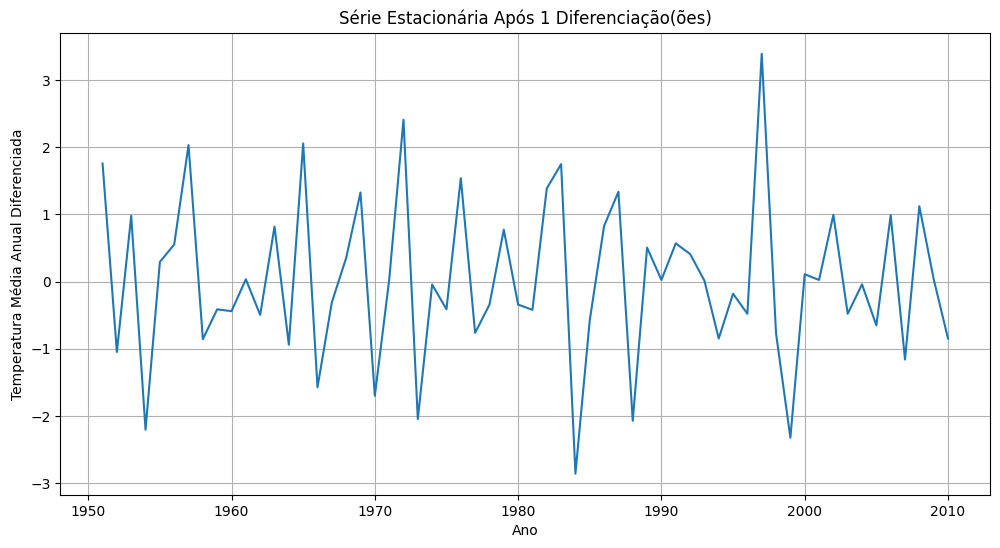

In [205]:
plt.figure(figsize=(12, 6))
elnino_diff.plot(title=f'Série Estacionária Após {d} Diferenciação(ões)')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média Anual Diferenciada')
plt.grid(True)
plt.show()

In [206]:
kpss_stat, p_value, _, _ = kpss(elnino_diff)
print('Teste KPSS Após Diferenciação:')
print(f'Estatística do teste: {kpss_stat:.4f}')
print(f'p-valor: {p_value:.4f}')
if p_value > 0.05:
    print("Série é estacionária.")
else:
    print("Série ainda não é estacionária.")

Teste KPSS Após Diferenciação:
Estatística do teste: 0.3280
p-valor: 0.1000
Série é estacionária.


C:\Users\Kesley\AppData\Local\Temp\ipykernel_3840\4265870494.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, _, _ = kpss(elnino_diff)


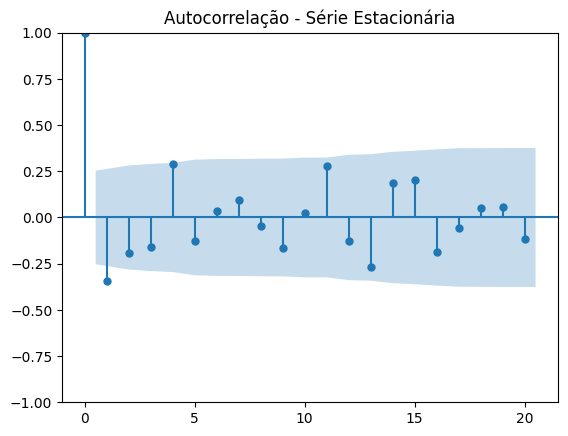

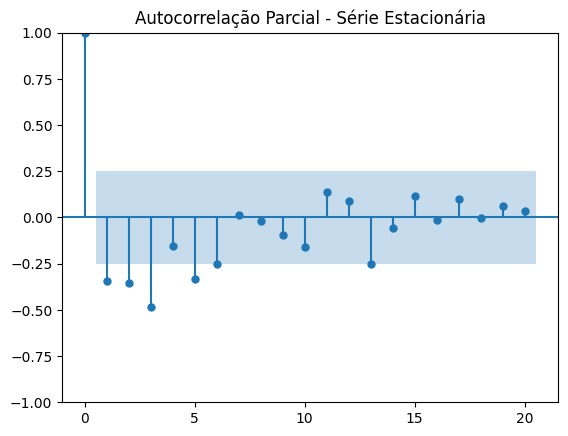

In [231]:
plot_acf(elnino_diff, lags=20)
plt.title("Autocorrelação - Série Estacionária")
plt.show()

plot_pacf(elnino_diff, lags=20)
plt.title("Autocorrelação Parcial - Série Estacionária")
plt.show()

In [227]:
def plot_acf_pacf(series, lags=10, title=''):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].plot(series)
    axes[0].set_title(f'Série Temporal - {title}')
    plot_acf(series, lags=lags, ax=axes[1])
    plot_pacf(series, lags=lags, ax=axes[2])
    plt.tight_layout()
    plt.show()
    

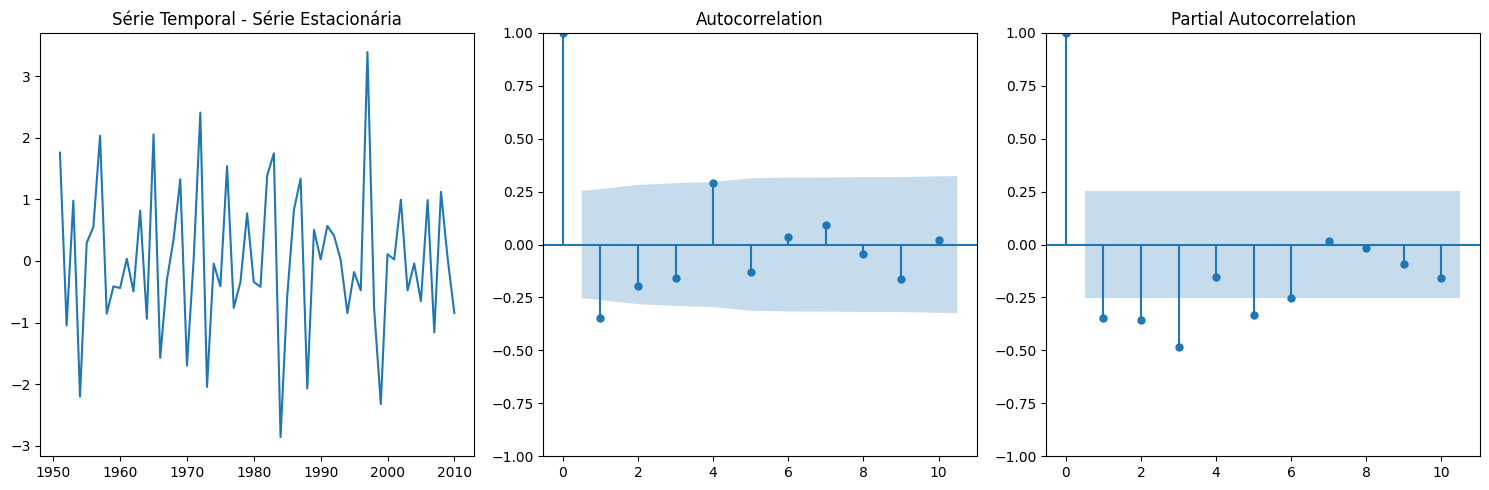

In [230]:
plot_acf_pacf(elnino_diff, title='Série Estacionária')

# 6. Decomposição da série temporal

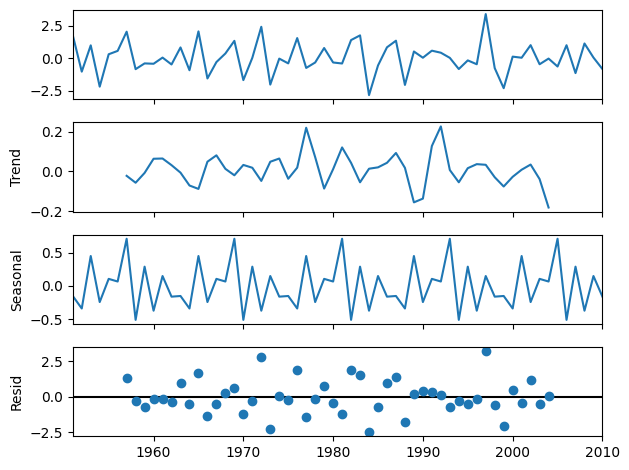

In [226]:
decomposition = seasonal_decompose(elnino_diff, model='additive', period=12)
decomposition.plot()
plt.show()

# 7. Transformações e diferenciações

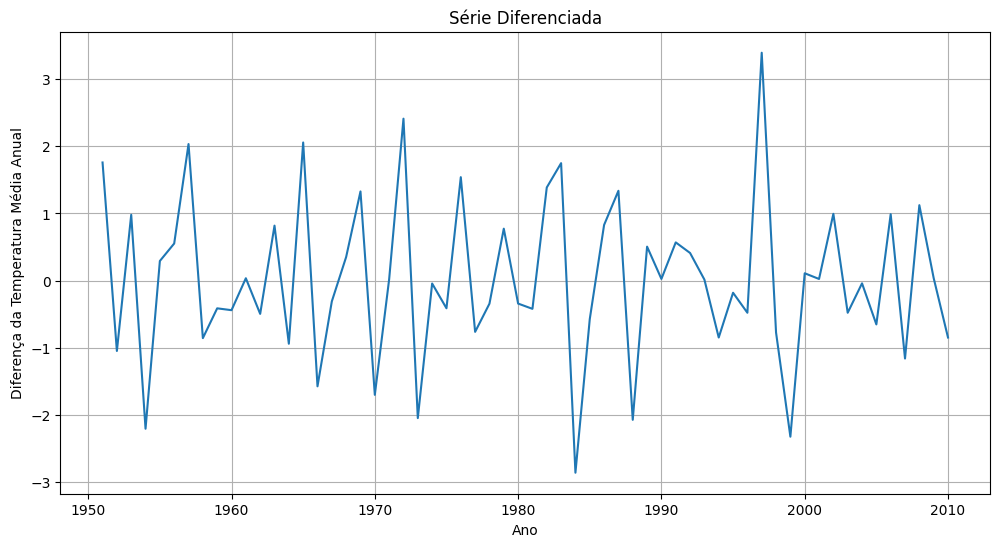


Série Diferenciada - Teste de Estacionariedade:
ADF Estatística: -6.5324, p-valor: 0.0000
Valores críticos:
1%: -3.5577
5%: -2.9168
10%: -2.5962
KPSS Estatística: 0.3280, p-valor: 0.1000
Valores críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Kesley\AppData\Local\Temp\ipykernel_3840\3997496104.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p_value, _, kpss_crit_values = kpss(series, regression='c')


In [233]:

plt.figure(figsize=(12, 6))
elnino_diff.plot(title='Série Diferenciada')
plt.xlabel('Ano')
plt.ylabel('Diferença da Temperatura Média Anual')
plt.grid(True)
plt.show()

test_stationarity(elnino_diff, "Série Diferenciada")

# 8. ACF e PACF

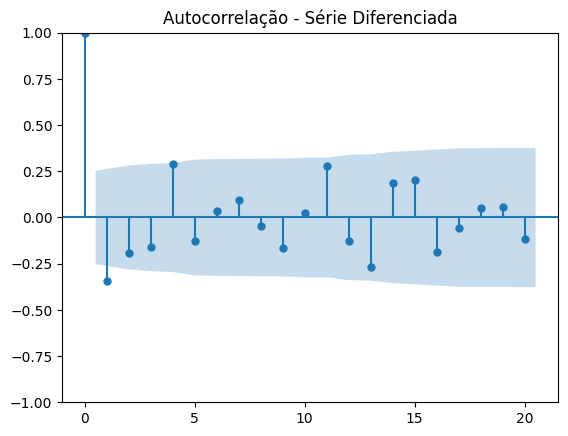

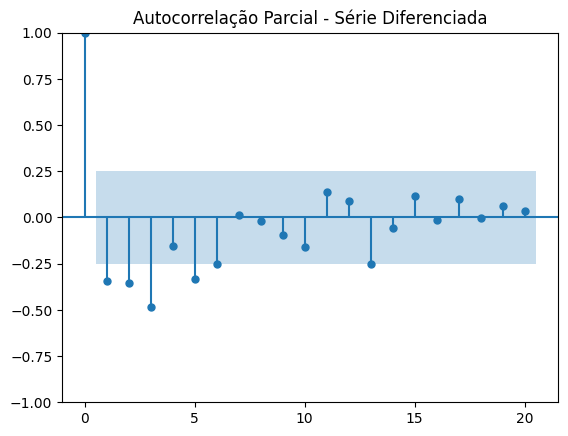

In [234]:
plot_acf(elnino_diff, lags=20)
plt.title("Autocorrelação - Série Diferenciada")
plt.show()

plot_pacf(elnino_diff, lags=20)
plt.title("Autocorrelação Parcial - Série Diferenciada")
plt.show()

# 9. Seleção do modelo usando auto_arima

In [235]:
model = auto_arima(elnino_diff, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=159.892, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=195.549, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=189.737, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=162.153, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=165.866, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=160.968, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=159.491, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=158.664, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=168.430, Time=0.03 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=160.416, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=183.571, Time=0.01 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=169.055, Time=0.03 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=161.482, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Tota

In [236]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(3, 0, 1)   Log Likelihood                 -74.332
Date:                Thu, 09 Jan 2025   AIC                            158.664
Time:                        18:13:19   BIC                            169.135
Sample:                             0   HQIC                           162.760
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1453      0.148     -0.981      0.327      -0.436       0.145
ar.L2         -0.3374      0.187     -1.805      0.071      -0.704       0.029
ar.L3         -0.2838      0.157     -1.808      0.0

# 10. Divisão de dados para treino e teste

In [238]:
train = elnino_diff.iloc[:-10]
test = elnino_diff.iloc[-10:]

## Ajustando o modelo ao conjunto de treino

In [239]:
model.fit(train)

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## Predição para o conjunto de teste

In [240]:
forecast = model.predict(n_periods=len(test))

c:\Users\Kesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Kesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Visualização das previsões

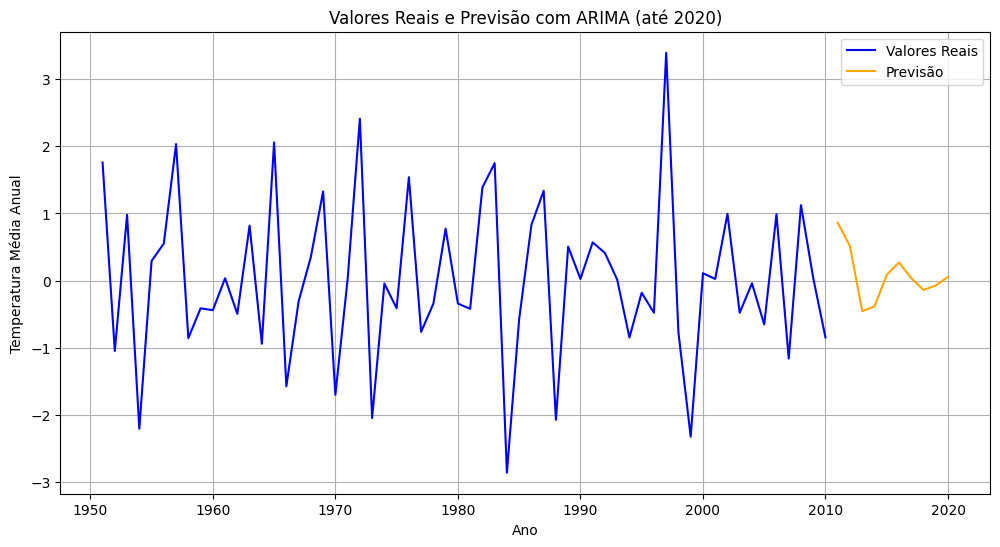

In [241]:
# Criando um índice estendido para incluir os anos das previsões
extended_index = elnino_diff.index.tolist() + [elnino_diff.index[-1] + i for i in range(1, 11)]

# Concatenando os valores reais (treino + teste) e as previsões
extended_series = pd.Series(data=np.concatenate([elnino_diff.values, forecast]), index=extended_index)

# Criando uma série separada apenas para as previsões
# forecast_series = pd.Series(data=forecast, index=[elnino_diff.index[-1] + i for i in range(1, 11)])

# Gráfico ajustado
plt.figure(figsize=(12, 6))
plt.plot(elnino_diff.index, elnino_diff.values, label='Valores Reais', color='blue')  # Dados reais
plt.plot(extended_series.index[-10:], extended_series.values[-10:], label='Previsão', color='orange')  # Previsões destacadas
plt.title("Valores Reais e Previsão com ARIMA (até 2020)")
plt.xlabel("Ano")
plt.ylabel("Temperatura Média Anual")
plt.legend()
plt.grid(True)
plt.show()


# 11. Avaliação do modelo

In [242]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 0.7713
MAE: 0.6607


# 12. Diagnóstico do modelo

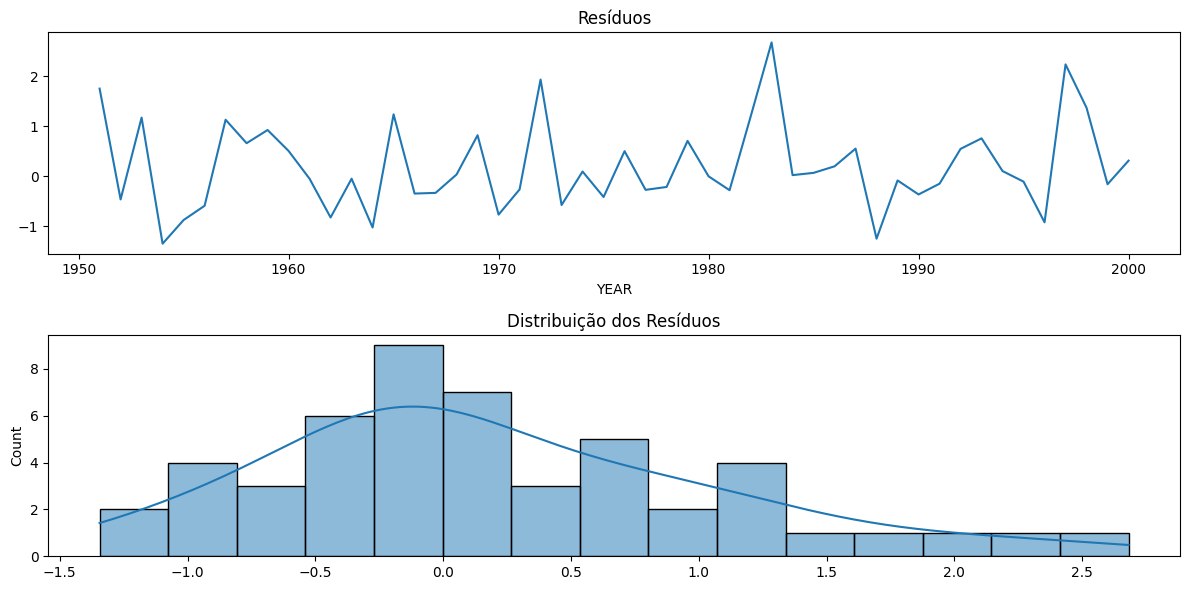

In [243]:
residuals = pd.Series(model.resid())
plt.figure(figsize=(12, 6))
plt.subplot(211)
residuals.plot(title="Resíduos")
plt.subplot(212)
sns.histplot(residuals, kde=True, bins=15)
plt.title("Distribuição dos Resíduos")
plt.tight_layout()
plt.show()

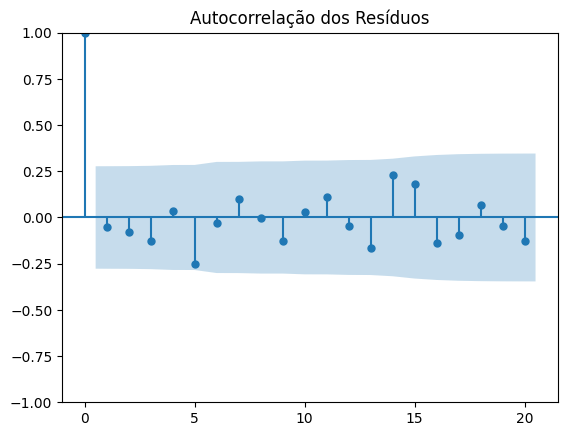

In [244]:
plot_acf(residuals, lags=20)
plt.title("Autocorrelação dos Resíduos")
plt.show()